In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
df_fat = pd.read_csv('../data/raw/faturamento_lojas_atuais.csv')

In [4]:
df_fat

,cod_loja,ano,mes,categoria,qtde,receita
0,1,2016,1,CATEG_01,301.0,9164.86
1,1,2016,2,CATEG_01,187.0,8175.55
2,1,2016,3,CATEG_01,242.0,10521.67
3,1,2016,4,CATEG_01,104.0,4560.91
4,1,2016,5,CATEG_01,100.0,4263.30
...,...,...,...,...,...,...
1003089,3687,2017,8,CATEG_14,334.0,634.60
1003090,3687,2017,9,CATEG_14,33.0,62.70
1003091,3687,2017,10,CATEG_14,184.0,349.60
1003092,3687,2017,11,CATEG_14,28.0,61.30


## Média de receita por mês e por estado

### Estudando os preços das categorias

In [32]:
price

,cod_loja,ano,mes,categoria,qtde,receita,cat_price
0,1,2016,1,CATEG_01,301.0,9164.86,30.448040
1,1,2016,2,CATEG_01,187.0,8175.55,43.719519
2,1,2016,3,CATEG_01,242.0,10521.67,43.477975
3,1,2016,4,CATEG_01,104.0,4560.91,43.854904
4,1,2016,5,CATEG_01,100.0,4263.30,42.633000
...,...,...,...,...,...,...,...
1003089,3687,2017,8,CATEG_14,334.0,634.60,1.900000
1003090,3687,2017,9,CATEG_14,33.0,62.70,1.900000
1003091,3687,2017,10,CATEG_14,184.0,349.60,1.900000
1003092,3687,2017,11,CATEG_14,28.0,61.30,2.189286


In [5]:
price = df_fat.copy()
price['cat_price'] = price['receita'] / price['qtde']
cat_price_agg = price.groupby(['categoria']).agg({'cat_price':[np.mean, np.std]})
cat_price_agg

cat_price              
                 mean           std
categoria                          
CATEG_01    28.985194  6.130847e+00
CATEG_02    30.038328  5.065931e+00
CATEG_03    29.495286  3.366318e+00
CATEG_04    37.455744  3.547037e+00
CATEG_05    40.193201  5.001312e+00
CATEG_06    52.416656  1.150945e+01
CATEG_07    22.315596  2.565955e+00
CATEG_08   102.889370  2.800904e+01
CATEG_09    35.546333  4.995662e+00
CATEG_10    48.303837  6.498625e+00
CATEG_11    91.514110  9.213413e+00
CATEG_12    17.352385  2.323191e+00
CATEG_13    41.733492  7.848301e+00
CATEG_14     2.655221  2.984762e+00
CATEG_15    28.196711  2.064408e+01
CATEG_16    29.990000  3.552714e-15

A maior parte das categorias tem preços bem constantes em diferentes lojas (std baixos). Supondo que as categorias tem diversos produtos (com exceção da 16), então um std baixo indica que em média os produtos vendidos em cada loja são mais ou menos os mesmos (dado que o preço de cada produto tende a ser constante no brasil inteiro). 

Plotei abaixo a distribuição dos preços médios das categorias com maiores stds por loja, para tentar identificar preferências por determinados produtos nas lojas.

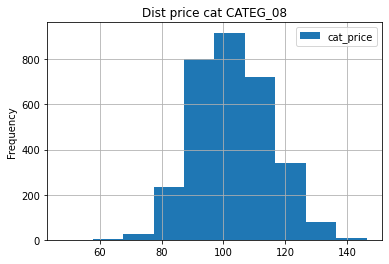

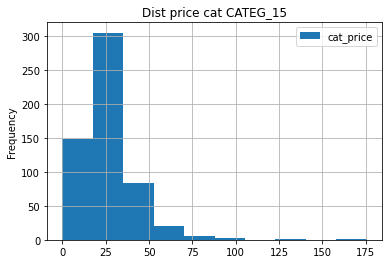

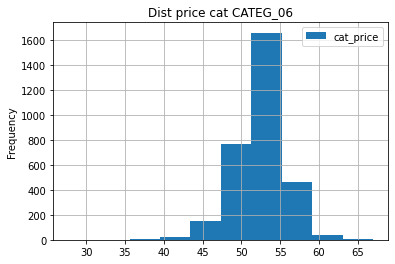

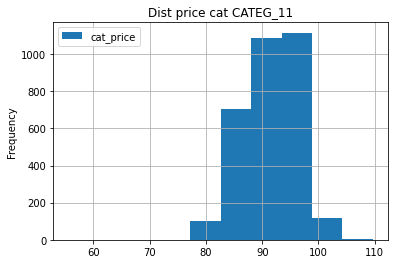

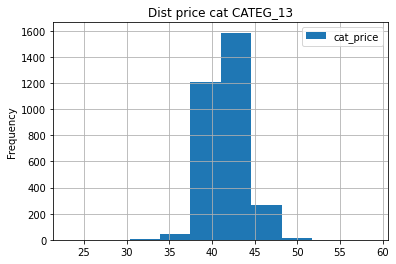

In [6]:
cat_greatest_std = cat_price_agg.sort_values(by=[('cat_price','std')], ascending=False).index[:5]
for CATEG in cat_greatest_std:
    df_cat = price.loc[price['categoria'] == CATEG][['cod_loja', 'cat_price']]
    df_cat = df_cat.groupby('cod_loja').agg({'cat_price':np.mean})
    df_cat.plot(kind='hist', grid = True, title = f'Dist price cat {CATEG}', bins = 10)

## Criando série de faturamento agregada por loja

In [7]:
from datetime import datetime

In [9]:
df_fat['date'] = df_fat['ano'].astype('str') + '-' + df_fat['mes'].astype('str')
df_fat['date'] = [datetime.strptime(x, '%Y-%m') for x in df_fat['date']]

In [10]:
loja1 = df_fat.loc[df_fat['cod_loja'] == 1].groupby('date').agg({'receita':np.sum}).reset_index()

In [11]:
-df_fat['mes'].iloc[:12]/6 * np.pi + np.pi/2

0     1.047198
1     0.523599
2     0.000000
3    -0.523599
4    -1.047198
5    -1.570796
6    -2.094395
7    -2.617994
8    -3.141593
9    -3.665191
10   -4.188790
11   -4.712389
Name: mes, dtype: float64

In [12]:
df_fat['mes sin'] = np.sin(np.pi/2 -df_fat['mes']/6 * np.pi)
df_fat['mes cos'] = np.cos(np.pi/2 -df_fat['mes']/6 * np.pi)
df_fat.iloc[:12]

,cod_loja,ano,mes,categoria,qtde,receita,date,mes sin,mes cos
0,1,2016,1,CATEG_01,301.0,9164.86,2016-01-01,8.660254e-01,5.000000e-01
1,1,2016,2,CATEG_01,187.0,8175.55,2016-02-01,5.000000e-01,8.660254e-01
2,1,2016,3,CATEG_01,242.0,10521.67,2016-03-01,0.000000e+00,1.000000e+00
3,1,2016,4,CATEG_01,104.0,4560.91,2016-04-01,-5.000000e-01,8.660254e-01
4,1,2016,5,CATEG_01,100.0,4263.30,2016-05-01,-8.660254e-01,5.000000e-01
5,1,2016,6,CATEG_01,108.0,4741.36,2016-06-01,-1.000000e+00,6.123234e-17
6,1,2016,7,CATEG_01,111.0,5604.77,2016-07-01,-8.660254e-01,-5.000000e-01
7,1,2016,8,CATEG_01,86.0,3987.35,2016-08-01,-5.000000e-01,-8.660254e-01
8,1,2016,9,CATEG_01,148.0,5543.12,2016-09-01,-1.224647e-16,-1.000000e+00
9,1,2016,10,CATEG_01,147.0,4996.06,2016-10-01,5.000000e-01,-8.660254e-01


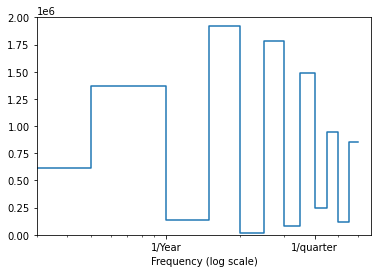

In [13]:
fft = tf.signal.rfft(loja1['receita'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(loja1['receita'])
months_per_year = 12
years_per_dataset = 2

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 2e6)
plt.xlim([0.3, max(plt.xlim())])
plt.xticks([1, 4], labels=['1/Year', '1/quarter'])
_ = plt.xlabel('Frequency (log scale)')

## ARIMA model:

Para ser nosso benchmark pessoal

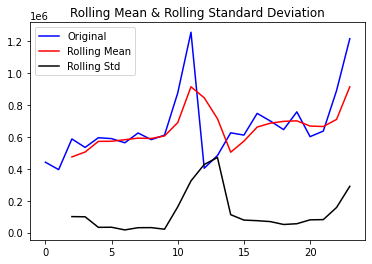

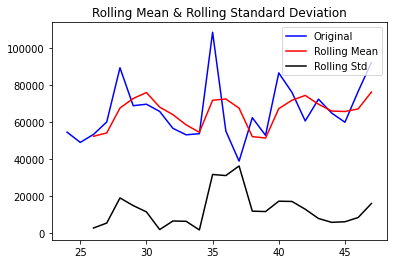

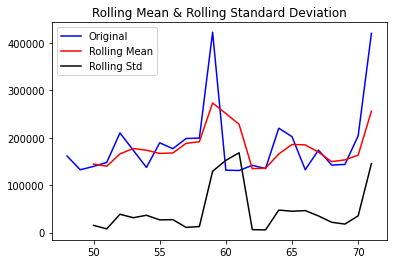

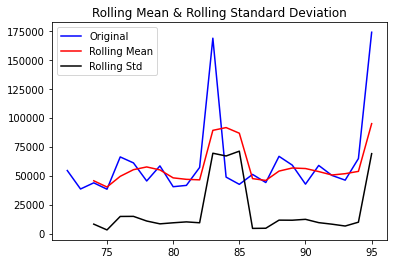

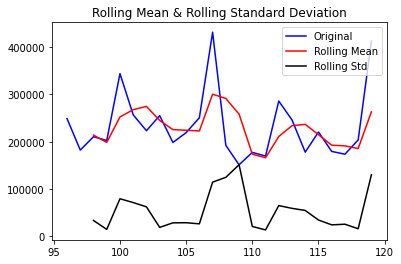

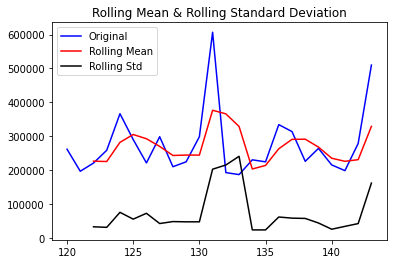

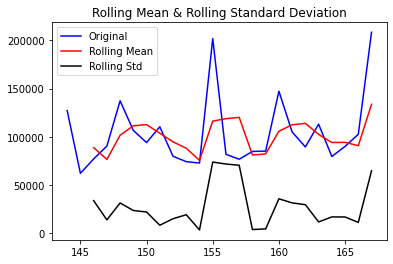

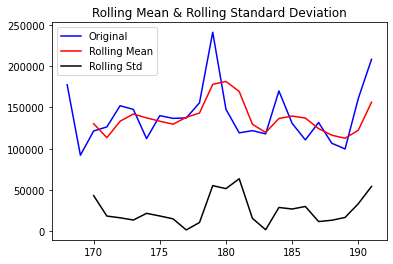

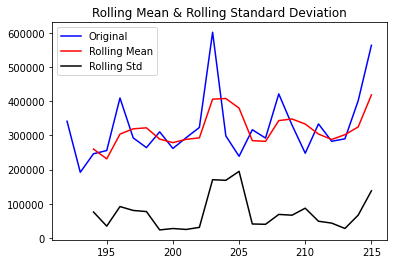

In [14]:
df_fat_store = df_fat.groupby(['cod_loja', 'date']).agg({'receita':np.sum}).reset_index()
for i in range(10):
    df_fat_i = df_fat_store.loc[df_fat_store['cod_loja'] == i][['date', 'receita']]
    rolling_mean = df_fat_i['receita'].rolling(window = 3).mean()
    rolling_std = df_fat_i['receita'].rolling(window = 3).std()
    if not df_fat_i.empty:
        plt.plot(df_fat_i['receita'], color = 'blue', label = 'Original')
        plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
        plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
        plt.legend(loc = 'best')
        plt.title('Rolling Mean & Rolling Standard Deviation')
        plt.show()

Claramente a time series não são estacionárias, então vamos forçar elas a serem

In [15]:
from statsmodels.tsa.stattools import adfuller

In [31]:
stationary = df_fat_store.copy()
stationary['ano'] = [x.year for x in df_fat_store['date']]
stationary['mes'] = [x.month for x in df_fat_store['date']]
df_16 = stationary.loc[stationary['ano'] == 2016][['cod_loja','mes','receita']]
df_17 = stationary.loc[stationary['ano'] == 2017][['cod_loja','mes','receita']]


,cod_loja,date,receita,ano,mes
0,1,2016-01-01,441833.37,2016,1
1,1,2016-02-01,395340.22,2016,2
2,1,2016-03-01,587810.18,2016,3
3,1,2016-04-01,534618.84,2016,4
4,1,2016-05-01,595477.92,2016,5


In [16]:
stationary_stores = []
for i in df_fat_store['cod_loja'].unique():
    df_fat_i = df_fat_store.loc[df_fat_store['cod_loja'] == i][['date', 'receita']]
    revenue = df_fat_i['receita'].copy()
#     rolling_mean = revenue.rolling(window = 2).mean()
#     ewm_mean = revenue.ewm(halflife=4).mean()
#     stationary = np.log(revenue) - np.log(revenue).shift()
    stationary
    stationary.dropna(inplace=True)
    try:
        if adfuller(stationary)[1] < 0.05:
            stationary_stores.append(i)
    except:
        pass

In [17]:
len(stationary_stores) / len(df_fat_store['cod_loja'].unique())

0.6932907348242812

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

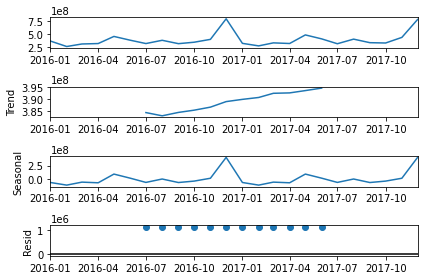

In [19]:
revenue_total = df_fat.groupby('date').agg({'receita':np.sum})
fig = seasonal_decompose(revenue_total).plot()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

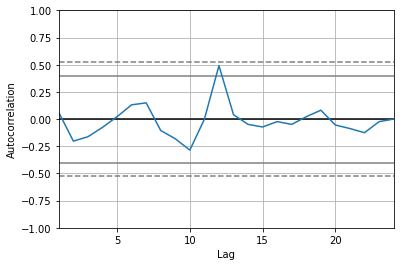

In [20]:
pd.plotting.autocorrelation_plot(revenue_total)

In [21]:
from statsmodels.tsa.arima.model import ARIMA

In [22]:
df_stationary = df_fat.loc[df_fat['cod_loja'].isin(stationary_stores)].groupby('date').agg({'receita':np.sum})

C:\Users\Lucas\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Lucas\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Lucas\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Lucas\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                SARIMAX Results                                
Dep. Variable:                receita   No. Observations:                    24
Model:                ARIMA(12, 2, 3)   Log Likelihood      -25465421268588.570
Date:                Mon, 16 Nov 2020   AIC                  50930842537209.141
Time:                        20:16:49   BIC                  50930842537226.594
Sample:                    01-01-2016   HQIC                 50930842537213.250
                         - 12-01-2017                                          
Covariance Type:                  opg                                          
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0935   2.08e-14  -4.49e+12      0.000      -0.094      -0.094
ar.L2         -0.0097   7.94e-14  -1.22e+11      0.000      -0.010      -0.010
ar.L3         -0.0469   4.67e-14     -1e+12 

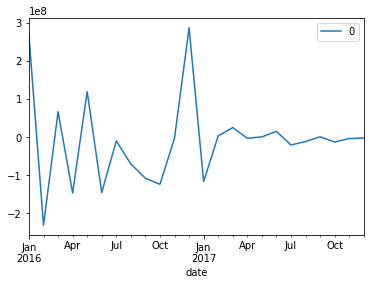

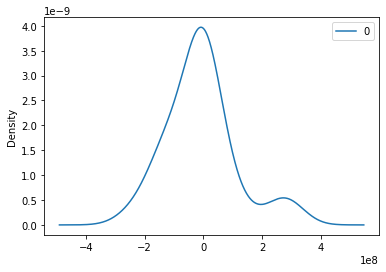

                  0
count  2.400000e+01
mean  -9.261013e+06
std    1.165682e+08
min   -2.309667e+08
25%   -7.967388e+07
50%   -3.298650e+06
75%    6.131878e+06
max    2.869021e+08


In [23]:
model = ARIMA(df_stationary['receita'], order=(12,2,3))
model_fit = model.fit()
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())